In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns



In [3]:
# Read the data from loan.csv file
df_loan = pd.read_csv('loan_88k.csv')

In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88738 entries, 0 to 88737
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           88738 non-null  int64  
 1   member_id                    88738 non-null  int64  
 2   loan_amnt                    88738 non-null  float64
 3   funded_amnt                  88738 non-null  float64
 4   funded_amnt_inv              88738 non-null  float64
 5   term                         88738 non-null  object 
 6   int_rate                     88738 non-null  float64
 7   installment                  88738 non-null  float64
 8   grade                        88738 non-null  object 
 9   sub_grade                    88738 non-null  object 
 10  emp_title                    83587 non-null  object 
 11  emp_length                   84211 non-null  object 
 12  home_ownership               88738 non-null  object 
 13  annual_inc      

In [5]:
# Review the size of the data
df_loan.shape

(88738, 74)

In [6]:
df_loan.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
                    ...  
all_util            86565
total_rev_hi_lim     6918
inq_fi              86565
total_cu_tl         86565
inq_last_12m        86565
Length: 74, dtype: int64

In [7]:
df_loan[df_loan.isnull().any(axis=1)]
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5765231,7197394,15000.0,15000.0,15000.0,36 months,14.09,513.33,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,47000.0,NaN,NaN,NaN
1,66421071,71156804,27600.0,27600.0,27550.0,60 months,21.99,762.13,F,F1,...,NaN,NaN,NaN,NaN,NaN,NaN,4100.0,NaN,NaN,NaN
2,68222480,73090197,6000.0,6000.0,6000.0,36 months,10.78,195.81,B,B4,...,26177.0,84.2,1.0,3.0,4921.0,79.7,12500.0,1.0,2.0,1.0
3,44515435,47583297,7000.0,7000.0,7000.0,36 months,12.29,233.48,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,20300.0,NaN,NaN,NaN
4,66564731,71290574,11525.0,11525.0,11525.0,36 months,9.17,367.41,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,51200.0,NaN,NaN,NaN


In [8]:
# Review the dataframe
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5765231,7197394,15000.0,15000.0,15000.0,36 months,14.09,513.33,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,47000.0,NaN,NaN,NaN
1,66421071,71156804,27600.0,27600.0,27550.0,60 months,21.99,762.13,F,F1,...,NaN,NaN,NaN,NaN,NaN,NaN,4100.0,NaN,NaN,NaN
2,68222480,73090197,6000.0,6000.0,6000.0,36 months,10.78,195.81,B,B4,...,26177.0,84.2,1.0,3.0,4921.0,79.7,12500.0,1.0,2.0,1.0
3,44515435,47583297,7000.0,7000.0,7000.0,36 months,12.29,233.48,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,20300.0,NaN,NaN,NaN
4,66564731,71290574,11525.0,11525.0,11525.0,36 months,9.17,367.41,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,51200.0,NaN,NaN,NaN


In [9]:
# List the columns
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [10]:
# Identify the columns with null values
df_loan.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [11]:
# Reduce dataset to only necessary columns
columns = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 
       'annual_inc', 'verification_status',
       'purpose', 'loan_status', 'total_pymnt', 'delinq_2yrs', 
       'inq_last_6mths', 'collections_12_mths_ex_med', 'revol_bal', 'total_acc']
df_data = df_loan[columns]
df_data.head()

#Removed ''earliest_cr_line' column as it is mixed with string and integer values, and could not be converted to integer

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,5765231,15000.0,15000.0,15000.0,36 months,14.09,513.33,B,10+ years,OWN,45000.0,Not Verified,credit_card,Fully Paid,17791.19,0.0,2.0,0.0,24356.0,45.0
1,66421071,27600.0,27600.0,27550.0,60 months,21.99,762.13,F,1 year,RENT,60000.0,Source Verified,debt_consolidation,Current,728.41,1.0,0.0,0.0,882.0,16.0
2,68222480,6000.0,6000.0,6000.0,36 months,10.78,195.81,B,< 1 year,RENT,20000.0,Source Verified,debt_consolidation,Issued,0.00,0.0,1.0,0.0,8554.0,10.0
3,44515435,7000.0,7000.0,7000.0,36 months,12.29,233.48,C,< 1 year,MORTGAGE,58900.0,Not Verified,home_improvement,Current,2091.76,2.0,0.0,0.0,14865.0,18.0
4,66564731,11525.0,11525.0,11525.0,36 months,9.17,367.41,B,10+ years,MORTGAGE,50000.0,Source Verified,debt_consolidation,Current,0.00,0.0,0.0,0.0,40122.0,19.0


In [12]:
# Check null values
df_data.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                    4527
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
loan_status                      0
total_pymnt                      0
delinq_2yrs                      1
inq_last_6mths                   1
collections_12_mths_ex_med      15
revol_bal                        0
total_acc                        1
dtype: int64

In [13]:
# Convert null values to 0
df_data_clean = df_data.fillna(0)
df_data_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,5765231,15000.0,15000.0,15000.0,36 months,14.09,513.33,B,10+ years,OWN,45000.0,Not Verified,credit_card,Fully Paid,17791.19,0.0,2.0,0.0,24356.0,45.0
1,66421071,27600.0,27600.0,27550.0,60 months,21.99,762.13,F,1 year,RENT,60000.0,Source Verified,debt_consolidation,Current,728.41,1.0,0.0,0.0,882.0,16.0
2,68222480,6000.0,6000.0,6000.0,36 months,10.78,195.81,B,< 1 year,RENT,20000.0,Source Verified,debt_consolidation,Issued,0.00,0.0,1.0,0.0,8554.0,10.0
3,44515435,7000.0,7000.0,7000.0,36 months,12.29,233.48,C,< 1 year,MORTGAGE,58900.0,Not Verified,home_improvement,Current,2091.76,2.0,0.0,0.0,14865.0,18.0
4,66564731,11525.0,11525.0,11525.0,36 months,9.17,367.41,B,10+ years,MORTGAGE,50000.0,Source Verified,debt_consolidation,Current,0.00,0.0,0.0,0.0,40122.0,19.0


In [14]:
# Transform string values to numerical values
def apply_label_encoding(column):
    labelencoder = LabelEncoder()
    return labelencoder.fit_transform(column)

columns_to_encode = ['term', 'grade', 'emp_length', 'home_ownership', 
                     'verification_status', 'purpose', 'loan_status']
df_data_clean[columns_to_encode] = df_data[columns_to_encode].apply(apply_label_encoding)
df_data_clean.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,5765231,15000.0,15000.0,15000.0,0,14.09,513.33,1,1,3,45000.0,0,1,5,17791.19,0.0,2.0,0.0,24356.0,45.0
1,66421071,27600.0,27600.0,27550.0,1,21.99,762.13,5,0,4,60000.0,1,2,1,728.41,1.0,0.0,0.0,882.0,16.0
2,68222480,6000.0,6000.0,6000.0,0,10.78,195.81,1,10,4,20000.0,1,2,7,0.00,0.0,1.0,0.0,8554.0,10.0
3,44515435,7000.0,7000.0,7000.0,0,12.29,233.48,2,10,0,58900.0,0,4,1,2091.76,2.0,0.0,0.0,14865.0,18.0
4,66564731,11525.0,11525.0,11525.0,0,9.17,367.41,1,1,0,50000.0,1,2,1,0.00,0.0,0.0,0.0,40122.0,19.0


In [15]:
# Define features set
X = df_data_clean.drop('grade', axis=1)
X.head(100)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,5765231,15000.0,15000.0,15000.0,0,14.09,513.33,1,3,45000.0,0,1,5,17791.190000,0.0,2.0,0.0,24356.0,45.0
1,66421071,27600.0,27600.0,27550.0,1,21.99,762.13,0,4,60000.0,1,2,1,728.410000,1.0,0.0,0.0,882.0,16.0
2,68222480,6000.0,6000.0,6000.0,0,10.78,195.81,10,4,20000.0,1,2,7,0.000000,0.0,1.0,0.0,8554.0,10.0
3,44515435,7000.0,7000.0,7000.0,0,12.29,233.48,10,0,58900.0,0,4,1,2091.760000,2.0,0.0,0.0,14865.0,18.0
4,66564731,11525.0,11525.0,11525.0,0,9.17,367.41,1,0,50000.0,1,2,1,0.000000,0.0,0.0,0.0,40122.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,49943470,8000.0,8000.0,8000.0,0,14.65,275.96,9,4,32000.0,2,2,1,1918.700000,0.0,2.0,1.0,5664.0,18.0
96,1066318,6000.0,6000.0,6000.0,0,13.49,203.59,5,0,50000.0,0,2,5,7325.298968,0.0,1.0,0.0,7361.0,14.0
97,41081613,8975.0,8975.0,8975.0,0,23.99,352.07,6,3,30000.0,1,6,1,3508.740000,0.0,0.0,0.0,1722.0,9.0
98,1235001,16000.0,16000.0,15975.0,1,12.12,356.89,9,4,74500.0,2,11,5,19781.667909,0.0,0.0,0.0,16005.0,42.0


In [16]:
# Define target vector (y)
y = df_data_clean['grade'].values

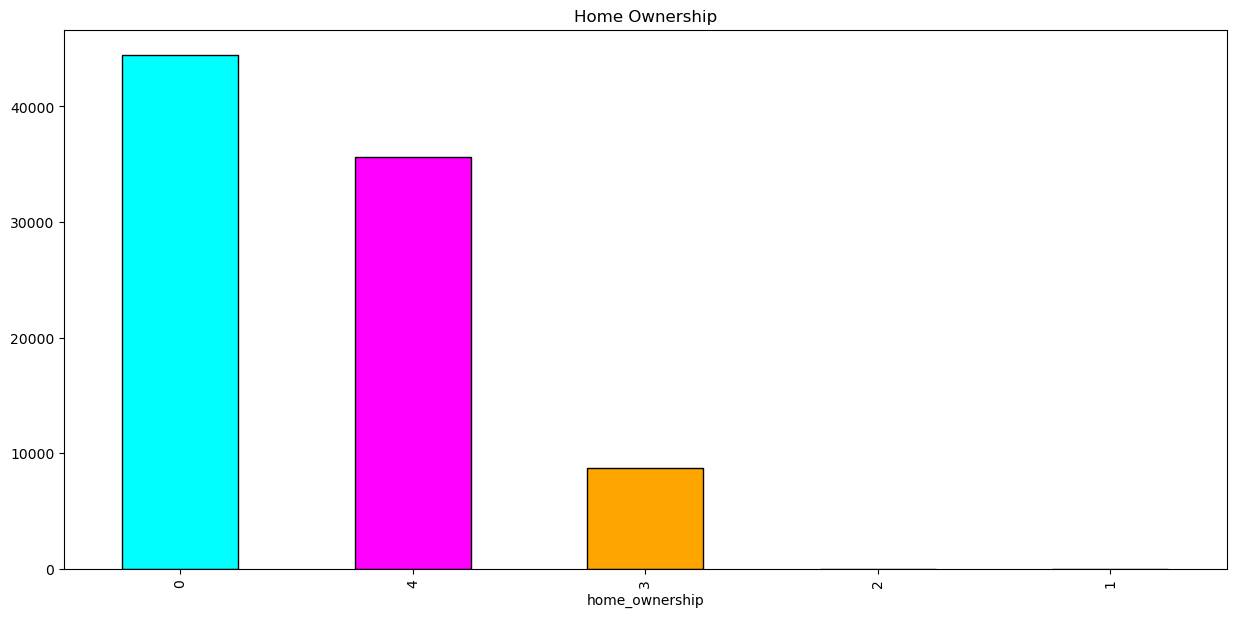

In [17]:
# Plot Count vs Home Ownership
# Label 0 = Mortgage, 1 = Misc, 2 = Other, 3 = Own, 4 = Rent
colors = ['cyan', 'magenta', 'orange', 'purple', 'red']
df_data_clean['home_ownership'].value_counts().plot(kind='bar', 
        title='Home Ownership', color=colors, edgecolor='black', figsize=(15,7))

plt.show()

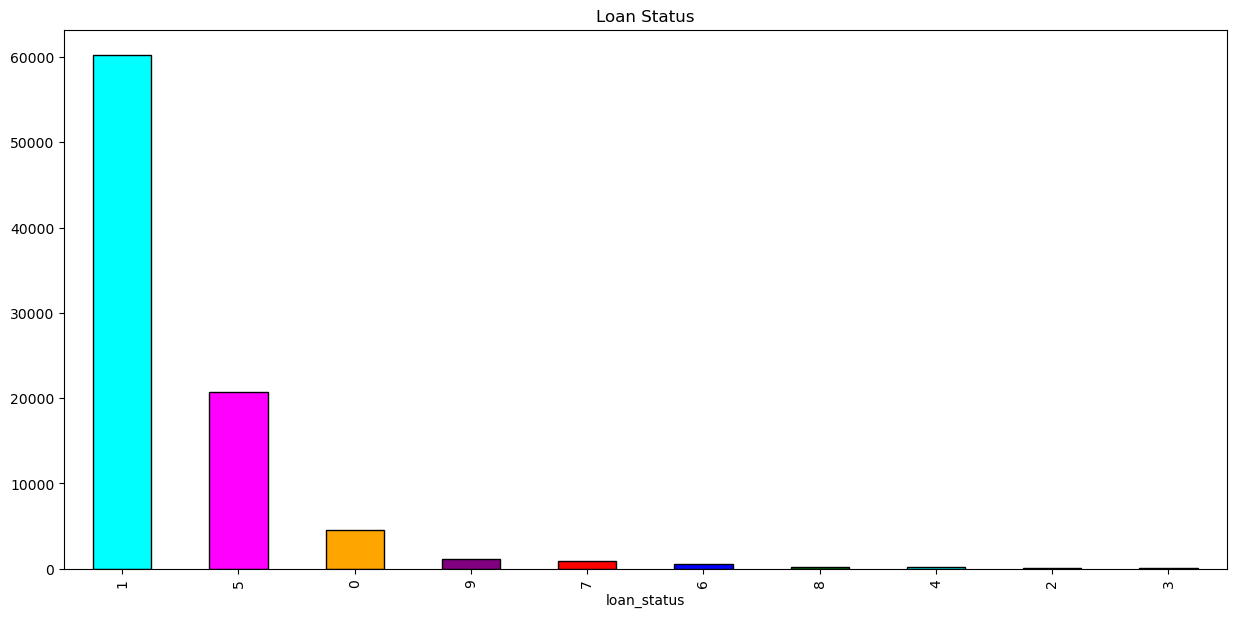

In [18]:
# Plot loan_status vs grade
# Label 0 = Charged Off, 1 = Current, 2 = Default, 3 = Fully Paid, 4 = In Grace Period, 5 = Late (16-30 days), 6 = Late (31-120 days)
colors = ['cyan', 'magenta', 'orange', 'purple', 'red', 'blue', 'green']
df_data_clean['loan_status'].value_counts().plot(kind='bar', 
        title='Loan Status', color=colors, edgecolor='black', figsize=(15,7))
plt.show()

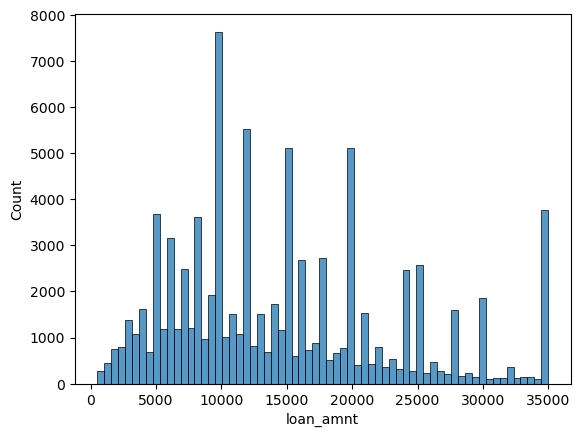

In [19]:
# Distribution of loan_amnt vs count
sns.histplot(df_data_clean['loan_amnt']).plot(kind='bar', 
        title='Loan Amount', color='blue', edgecolor='black', figsize=(15,7))
plt.show()

In [20]:
# Add new columns to the dataframe - funded amount to annual_inc ratio
df_data_clean_R1 = df_data_clean.copy()
df_data_clean_R1['funded_amnt_to_annual_inc'] = (df_data_clean_R1['funded_amnt'] / df_data_clean_R1['annual_inc'])*100
df_data_clean_R1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc,funded_amnt_to_annual_inc
0,5765231,15000.0,15000.0,15000.0,0,14.09,513.33,1,1,3,...,0,1,5,17791.19,0.0,2.0,0.0,24356.0,45.0,33.333333
1,66421071,27600.0,27600.0,27550.0,1,21.99,762.13,5,0,4,...,1,2,1,728.41,1.0,0.0,0.0,882.0,16.0,46.000000
2,68222480,6000.0,6000.0,6000.0,0,10.78,195.81,1,10,4,...,1,2,7,0.00,0.0,1.0,0.0,8554.0,10.0,30.000000
3,44515435,7000.0,7000.0,7000.0,0,12.29,233.48,2,10,0,...,0,4,1,2091.76,2.0,0.0,0.0,14865.0,18.0,11.884550
4,66564731,11525.0,11525.0,11525.0,0,9.17,367.41,1,1,0,...,1,2,1,0.00,0.0,0.0,0.0,40122.0,19.0,23.050000


<Axes: xlabel='funded_amnt_to_annual_inc', ylabel='grade'>

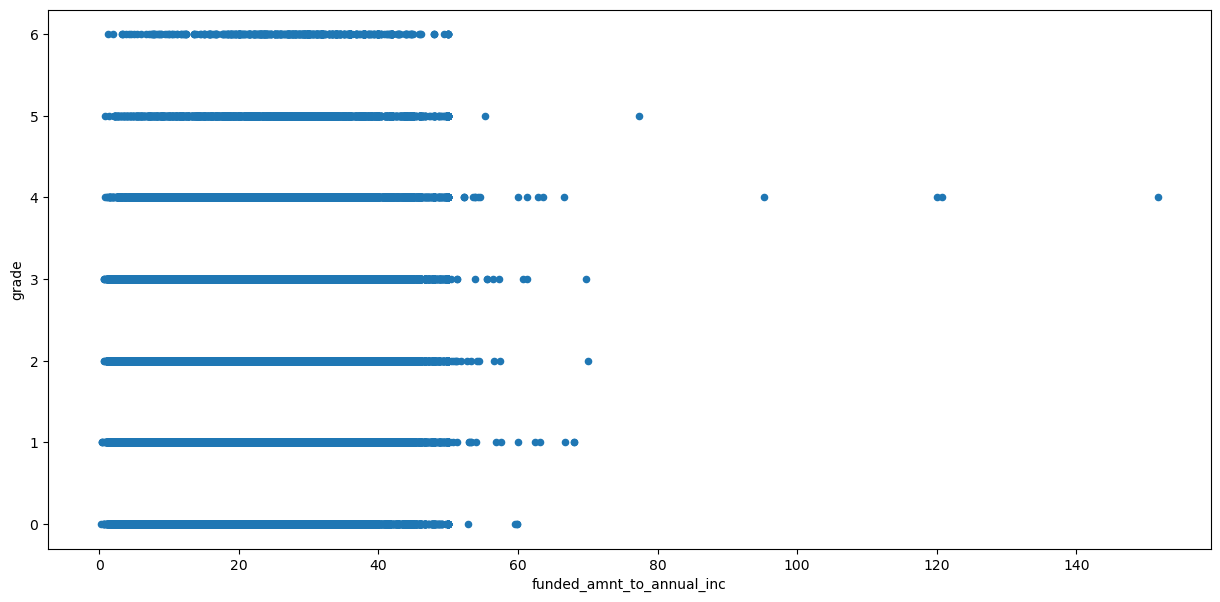

In [21]:
# Plot df_data_clean_R1['funded_amnt_to_annual_inc'] vs grade
df_data_clean_R1.plot.scatter(x='funded_amnt_to_annual_inc', y='grade', figsize=(15,7))

In [22]:
# Add new columns to the dataframe - revol_bal to annual_inc ratio
df_data_clean_R2 = df_data_clean.copy()
df_data_clean_R2['revol_bal_to_annual_inc'] = (df_data_clean['revol_bal'] / df_data_clean['annual_inc'])*100
df_data_clean_R2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc,revol_bal_to_annual_inc
0,5765231,15000.0,15000.0,15000.0,0,14.09,513.33,1,1,3,...,0,1,5,17791.19,0.0,2.0,0.0,24356.0,45.0,54.124444
1,66421071,27600.0,27600.0,27550.0,1,21.99,762.13,5,0,4,...,1,2,1,728.41,1.0,0.0,0.0,882.0,16.0,1.470000
2,68222480,6000.0,6000.0,6000.0,0,10.78,195.81,1,10,4,...,1,2,7,0.00,0.0,1.0,0.0,8554.0,10.0,42.770000
3,44515435,7000.0,7000.0,7000.0,0,12.29,233.48,2,10,0,...,0,4,1,2091.76,2.0,0.0,0.0,14865.0,18.0,25.237691
4,66564731,11525.0,11525.0,11525.0,0,9.17,367.41,1,1,0,...,1,2,1,0.00,0.0,0.0,0.0,40122.0,19.0,80.244000


<Axes: xlabel='revol_bal_to_annual_inc', ylabel='grade'>

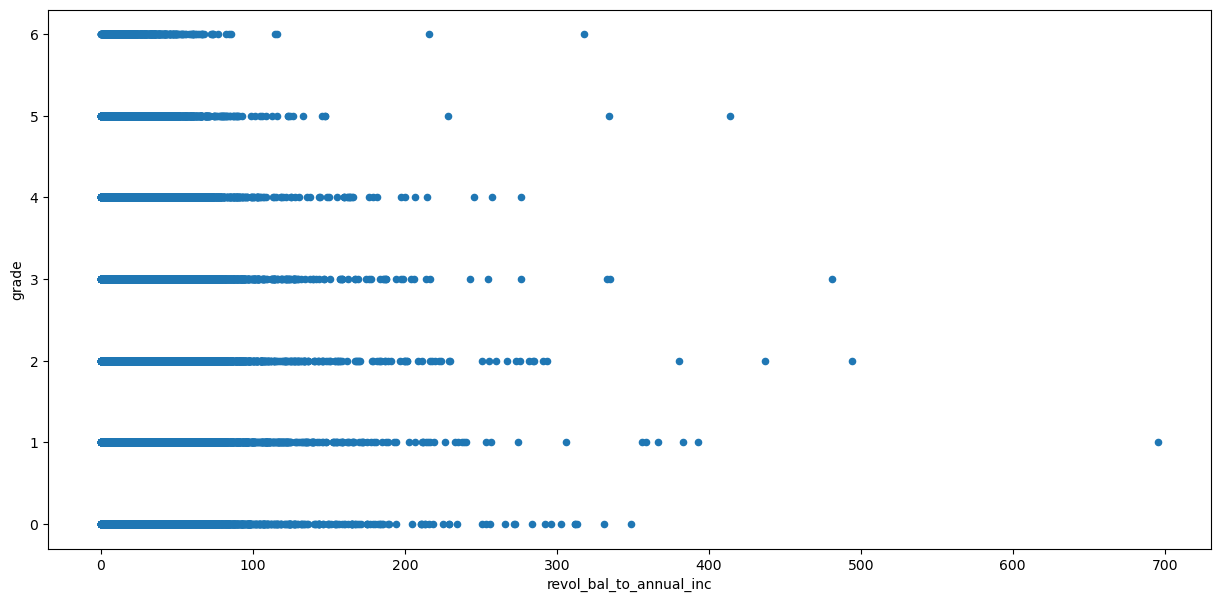

In [23]:
# Plot df_data_clean_R2['revol_bal_to_annual_inc'] vs grade
df_data_clean_R2.plot.scatter(x='revol_bal_to_annual_inc', y='grade', figsize=(15,7))

<Axes: xlabel='int_rate', ylabel='grade'>

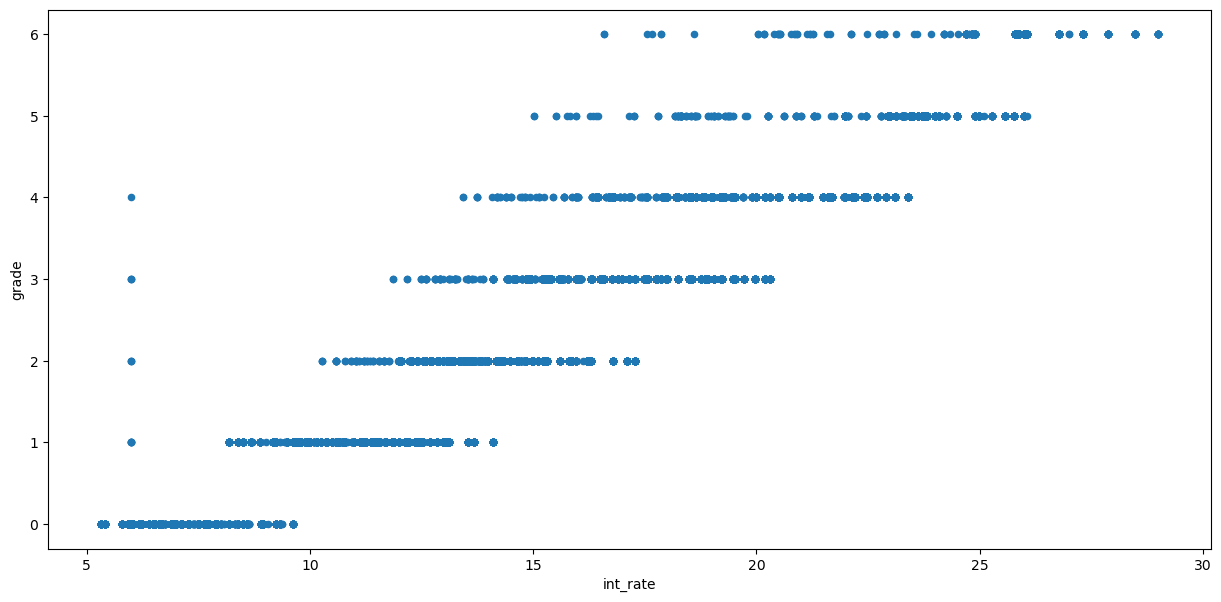

In [24]:
# Plot df_data_clean['int_rate'] vs grade
df_data_clean.plot.scatter(x='int_rate', y='grade', figsize=(15,7))

<Axes: xlabel='home_ownership', ylabel='grade'>

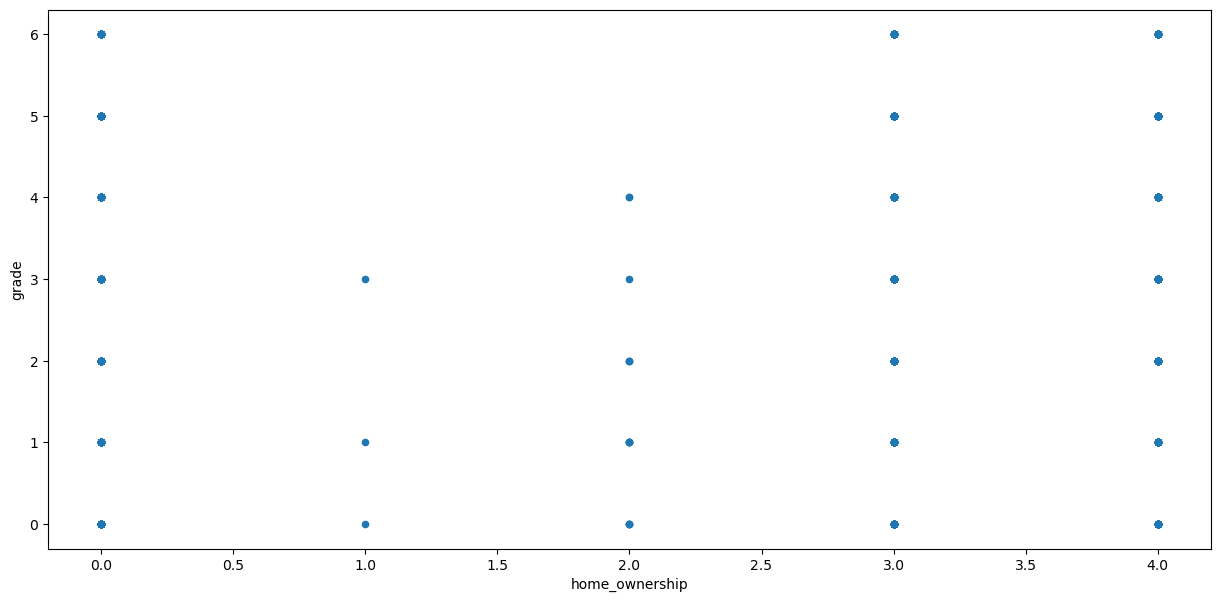

In [25]:
# Plot df_data_clean['home_ownership'] vs grade
df_data_clean.plot.scatter(x='home_ownership', y='grade', figsize=(15,7))

<Axes: xlabel='delinq_2yrs', ylabel='grade'>

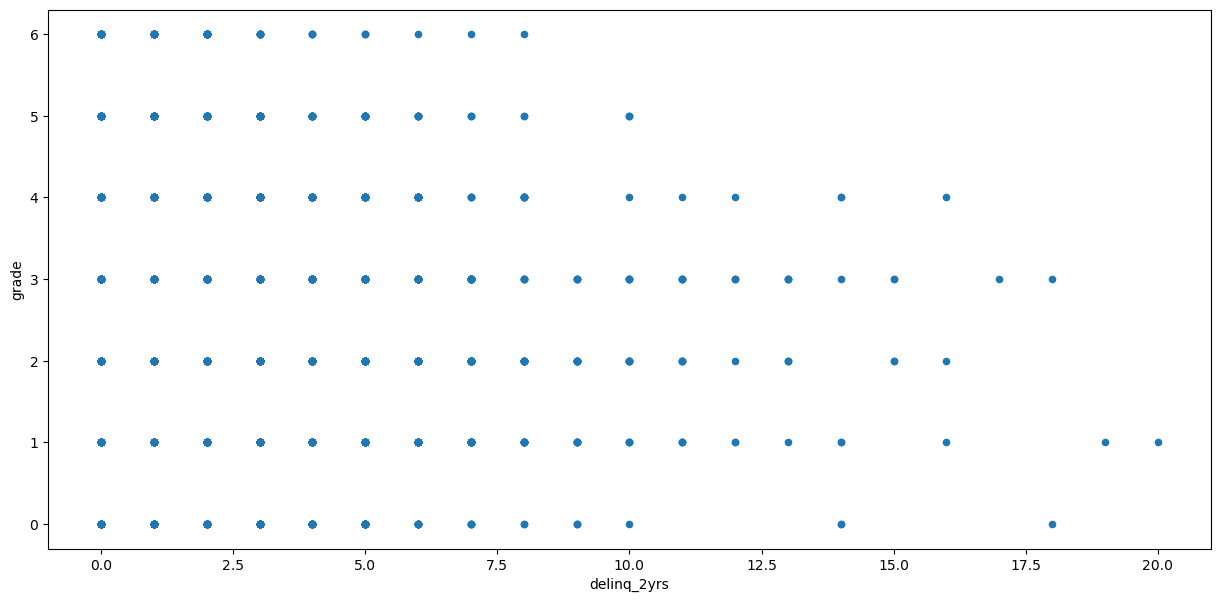

In [26]:
# Plot df_data_clean['delinq_2yrs'] vs grade
df_data_clean.plot.scatter(x='delinq_2yrs', y='grade', figsize=(15,7))

<Axes: xlabel='emp_length', ylabel='grade'>

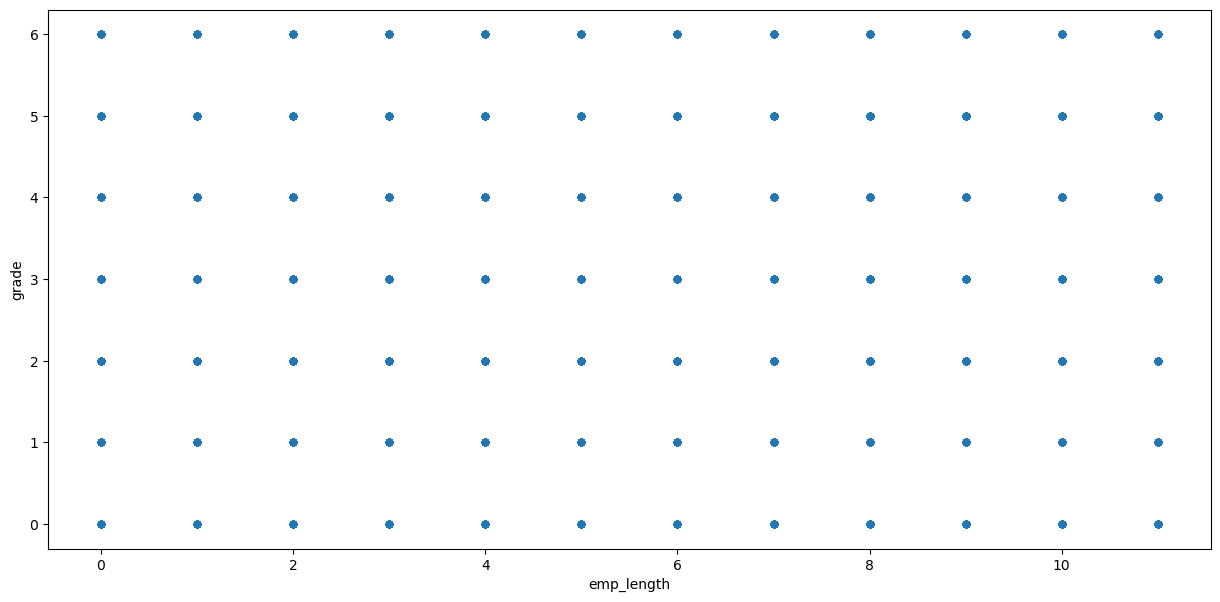

In [27]:
# Plot df_data_clean['emp_length'] vs grade
df_data_clean.plot.scatter(x='emp_length', y='grade', figsize=(15,7))

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
#Create a StandardScaler model and fit it into the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)


StandardScaler()

In [30]:
# Transform the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Use Linear Regression model
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression().fit(X_train_scaled, y_train)


In [32]:
# Make predictions using the testing data
LR_predictions = LR_model.predict(X_test_scaled)

# Print the r2 score for the model
print(f"Linear Regression R2 Score: {LR_model.score(X_test_scaled, y_test)}")

Linear Regression R2 Score: 0.9332079830254443


k: 1, Train/Test Score: 1.000/0.631
k: 3, Train/Test Score: 0.808/0.617
k: 5, Train/Test Score: 0.769/0.636
k: 7, Train/Test Score: 0.750/0.643
k: 9, Train/Test Score: 0.735/0.645
k: 11, Train/Test Score: 0.726/0.650
k: 13, Train/Test Score: 0.719/0.652
k: 15, Train/Test Score: 0.713/0.651
k: 17, Train/Test Score: 0.709/0.653
k: 19, Train/Test Score: 0.704/0.650


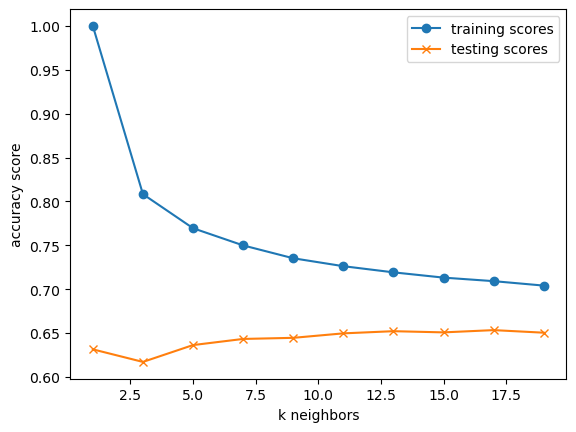

In [33]:
# Use K-Nearest Neighbor model to predict the grade of the loan
# Loop through different k values to find which has the highest accuracy.

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [34]:
# Train the model with k = 9 value
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Accuracy: 0.645


In [35]:
# Train the Random Forest model to compare with K-Nearest Neighbor model
rf = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score by RF: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score by RF: {rf.score(X_test_scaled, y_test)}')

Training Score by RF: 0.9990083091671299
Testing Score by RF: 0.961956276763579


In [36]:
# Make predictions using the testing data
predictions = rf.predict(X_test_scaled)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

# Display the accuracy score
print("Accuracy Score by RF: %.3f" % accuracy_score(y_test, predictions))

Accuracy Score by RF: 0.962


In [37]:
# Accuracy of Random Forest model is higher than K-Nearest Neighbor model

In [38]:
# Get feature importance array
feature_importances = rf.feature_importances_

In [39]:
# List top 10 most important features
importances_sorted = sorted(zip(rf.feature_importances_, X.columns), reverse=True)
importances_sorted[:20]

[(0.6829654883624243, 'int_rate'),
 (0.06575198057984623, 'id'),
 (0.045799311845050525, 'installment'),
 (0.027956904782740388, 'total_pymnt'),
 (0.0221454159820415, 'term'),
 (0.020220161890083632, 'annual_inc'),
 (0.017938199327117554, 'revol_bal'),
 (0.01781844453581074, 'funded_amnt_inv'),
 (0.016999195820911677, 'loan_amnt'),
 (0.016703591466003136, 'funded_amnt'),
 (0.015082753850168256, 'total_acc'),
 (0.01008088466939512, 'purpose'),
 (0.009641498477822795, 'emp_length'),
 (0.008774606013434176, 'inq_last_6mths'),
 (0.006982852697765096, 'verification_status'),
 (0.006829914955392571, 'loan_status'),
 (0.004019235577984388, 'home_ownership'),
 (0.0038795078720805557, 'delinq_2yrs'),
 (0.0004100512939273032, 'collections_12_mths_ex_med')]

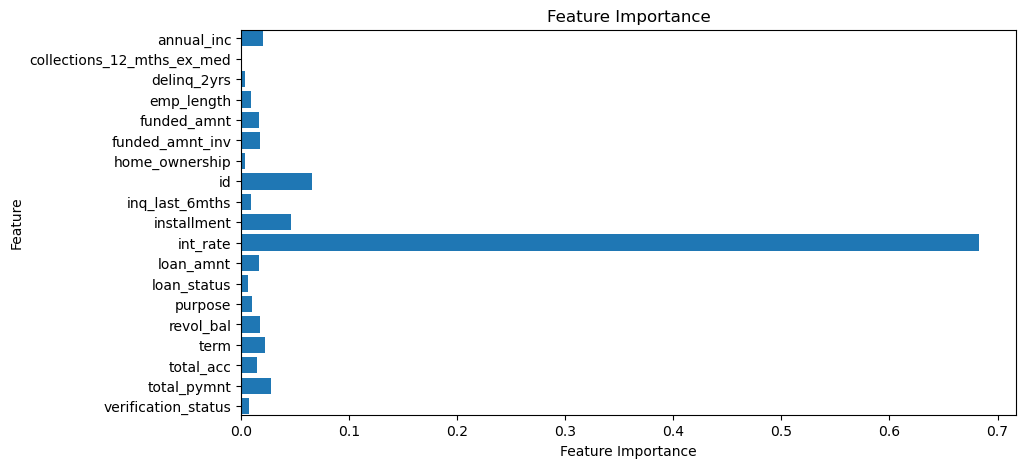

In [40]:
# Plot the feature importance
features = sorted(zip(rf.feature_importances_, X.columns), key = lambda x: x[1], reverse=True)
columns = [x[0] for x in features]
width = [x[1] for x in features]

fig, ax = plt.subplots()

fig.set_size_inches(10, 5)
plt.margins(y=0.001)
ax.barh(width, columns, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [41]:
# Fit training data to XGBoost model
from xgboost import XGBClassifier

XGBmodel = XGBClassifier()
XGBmodel.fit(X_train_scaled, y_train)

# Predict the results from Test set
y_predict_XGB = XGBmodel.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3837
           1       1.00      1.00      1.00      6331
           2       1.00      1.00      1.00      6082
           3       0.99      0.99      0.99      3456
           4       0.98      0.97      0.97      1781
           5       0.95      0.96      0.96       565
           6       0.97      0.95      0.96       133

    accuracy                           0.99     22185
   macro avg       0.98      0.98      0.98     22185
weighted avg       0.99      0.99      0.99     22185

